### W207 Final Project - Forest Coverage Classification

#### Mohan's iteration v3

The project and data is from https://www.kaggle.com/c/forest-cover-type-prediction/overview

We chose to use the K-Nearest Neighbors Classifier for the baseline.

In [121]:
#import relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [122]:
# Read the data

df = pd.read_csv("data/train.csv")
test_data = pd.read_csv("data/test.csv")

In [123]:
# Rename columns
df.columns = ["Id", "Elevation", "Aspect", "Slope", "Horizontal_Distance_To_Hydrology",
    "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways",
    "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm", "Horizontal_Distance_To_Fire_Points",
    "Wilderness_Area1", "Wilderness_Area2", "Wilderness_Area3", "Wilderness_Area4",
    "Soil_Type1",  "Soil_Type2",  "Soil_Type3",  "Soil_Type4",  "Soil_Type5",  "Soil_Type6",
    "Soil_Type7",  "Soil_Type8",  "Soil_Type9",  "Soil_Type10", "Soil_Type11", "Soil_Type12",
    "Soil_Type13", "Soil_Type14", "Soil_Type15", "Soil_Type16", "Soil_Type17",
    "Soil_Type18", "Soil_Type19", "Soil_Type20", "Soil_Type21", "Soil_Type22",
    "Soil_Type23", "Soil_Type24", "Soil_Type25", "Soil_Type26", "Soil_Type27",
    "Soil_Type28", "Soil_Type29", "Soil_Type30", "Soil_Type31", "Soil_Type32",
    "Soil_Type33", "Soil_Type34", "Soil_Type35", "Soil_Type36", "Soil_Type37",
    "Soil_Type38", "Soil_Type39", "Soil_Type40", "Cover_Type"]



In [124]:
# Seperating features (X) and labels (y)
from sklearn.model_selection import train_test_split

X, y = df.drop(["Cover_Type"], axis = 1), df["Cover_Type"]

train_data, dev_data, train_data_label, dev_data_label = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)
print('train_data shape: ',train_data.shape)
print('train_data_labels shape: ',train_data_label.shape)
print('dev_data shape: ',dev_data.shape)
print('dev_data_labels shape: ',dev_data_label.shape)

train_data shape:  (12096, 55)
train_data_labels shape:  (12096,)
dev_data shape:  (3024, 55)
dev_data_labels shape:  (3024,)


In [80]:
dev_data.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
3551,3552,2311,102,25,525,17,1392,252,199,59,...,0,0,0,0,0,0,0,0,0,0
5928,5929,2315,315,18,134,28,1500,170,223,192,...,0,0,0,0,0,0,0,0,0,0
13057,13058,2276,91,16,0,0,1072,243,212,93,...,0,0,0,0,0,0,0,0,0,0
2815,2816,2797,174,23,272,91,600,226,245,138,...,0,0,0,0,0,0,0,0,0,0
12192,12193,2038,15,3,0,0,700,217,233,154,...,0,0,0,0,0,0,0,0,0,0


### Baseline model

In [81]:
#create a KNN model with varying nearest neighbors as the baseline
#We chose to loop through values from 1 to 20 to assess the F1 scores the KNN algorithm
f1 = []
for i in range(1,21):
    knn_model = KNeighborsClassifier(n_neighbors = i)
    knn_model.fit(train_data, train_data_label)
    y_dev_pred = knn_model.predict(dev_data)
    knn_f1 = round(metrics.f1_score(dev_data_label, y_dev_pred, average='macro'),4)
    f1.append(knn_f1)
    if (i == 1 or i % 2 == 0):
        print("k = ", i, "F1 of baseline model = " + str(knn_f1))
        print("")

k =  1 F1 of baseline model = 0.8445

k =  2 F1 of baseline model = 0.8253

k =  4 F1 of baseline model = 0.8089

k =  6 F1 of baseline model = 0.7967

k =  8 F1 of baseline model = 0.78

k =  10 F1 of baseline model = 0.7702

k =  12 F1 of baseline model = 0.7636

k =  14 F1 of baseline model = 0.7569

k =  16 F1 of baseline model = 0.7487

k =  18 F1 of baseline model = 0.7365

k =  20 F1 of baseline model = 0.7292



Text(0, 0.5, 'F1 Score')

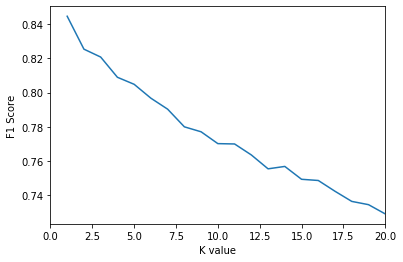

In [82]:
plt.plot(range(1,21), f1)
plt.xlim(0,20)
plt.xlabel("K value")
plt.ylabel("F1 Score")

We can see that the F1 scores decline as K increases. We will use the baseline value of k = 1. The f1 score is .8445.

## EDA

There are twelve distinct features available to us:

1. **Elevation** - Elevation in meters 
2. **Aspect** - Aspect in degrees azimuth 
3. **Slope** - Slope in degrees 
4. **Horizontal_Distance_To_Hydrology** - Horzontal distance to nearest surface water features 
5. **Vertical_Distance_To_Hydrology** - Vertical distance to nearest surface water features 
6. **Horizontal_Distance_To_Roadways** - Horzontal distance to nearest roadway 
7. **Hillshade_9am (0 to 255 index)** - Hillshade distance at 9am, summer solstice 
8. **Hillshade_Noon (0 to 255 index)** - Hillshade index at noon, summer solstice 
9. **Hillshade_3pm (0 to 255 index)** - Hillshade index at 3pm, summer solstice 
10. **Horizontal_Distance_To_Fire_Points** - Horzontal distance to nearest wildfire ignition points 
11. **Wilderness_Area** (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation 
12. **Soil_Type** (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation 

Target is **Cover_Type** that designates forest cover type. The 7 cover types are:

1. Spruce/Fir
2. Lodgepole Pine
3. Ponderosa Pine
4. Cottonwood/Willow
5. Aspen
6. Douglas-fir
7. Krummholz

In [83]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,15120.0,7560.500000,4364.912370,1.0,3780.75,7560.5,11340.25,15120.0
Elevation,15120.0,2749.322553,417.678187,1863.0,2376.00,2752.0,3104.00,3849.0
Aspect,15120.0,156.676653,110.085801,0.0,65.00,126.0,261.00,360.0
Slope,15120.0,16.501587,8.453927,0.0,10.00,15.0,22.00,52.0
Horizontal_Distance_To_Hydrology,15120.0,227.195701,210.075296,0.0,67.00,180.0,330.00,1343.0
Vertical_Distance_To_Hydrology,15120.0,51.076521,61.239406,-146.0,5.00,32.0,79.00,554.0
Horizontal_Distance_To_Roadways,15120.0,1714.023214,1325.066358,0.0,764.00,1316.0,2270.00,6890.0
Hillshade_9am,15120.0,212.704299,30.561287,0.0,196.00,220.0,235.00,254.0
Hillshade_Noon,15120.0,218.965608,22.801966,99.0,207.00,223.0,235.00,254.0
Hillshade_3pm,15120.0,135.091997,45.895189,0.0,106.00,138.0,167.00,248.0


#### correlation matrix - Stefania
#### univariate analysis - Emily
#### DONE - distribution of soil types and forest cover type - Mohan

### Cover type distribution

In [84]:
# Distribution of cover type

coversType = df['Cover_Type']
coversType.describe().T

count    15120.000000
mean         4.000000
std          2.000066
min          1.000000
25%          2.000000
50%          4.000000
75%          6.000000
max          7.000000
Name: Cover_Type, dtype: float64

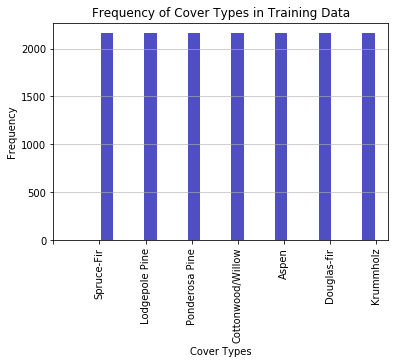

In [85]:
# Distribution of cover type
# Note - Need help on changing the xtick labels - it could look better
# https://realpython.com/python-histograms/
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xticks.html

import matplotlib.pyplot as plt 

n, bins, patches = plt.hist(x=coversType, color='#0504aa', bins='auto',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Cover Types')
plt.ylabel('Frequency')
plt.title('Frequency of Cover Types in Training Data')
plt.xticks(np.arange(8), ('','Spruce-Fir', 'Lodgepole Pine', 'Ponderosa Pine', 'Cottonwood/Willow', 'Aspen', 'Douglas-fir', 'Krummholz'), rotation=90)
plt.show()


The distribution of cover types is uniform across the training data set.

### Soil type distribution

Soil type is represented as a binary feature in the data set There are 40 different features for each soil type.

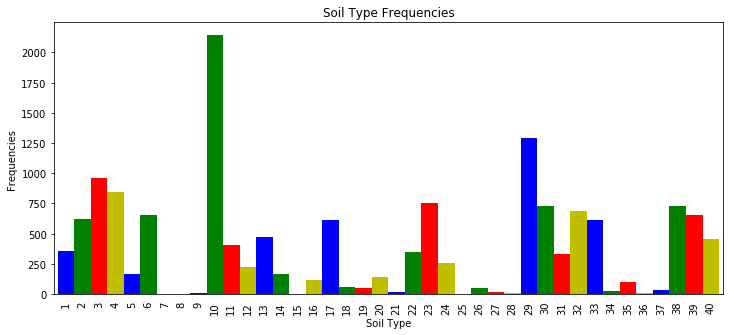

In [86]:
soil_df = df.loc[:,'Soil_Type1':'Soil_Type40']
soil_df.columns = range(1,41)
soil_series = soil_df.sum()
colors = ['b', 'g', 'r', 'y']

ax  = soil_series.plot(kind='bar', title = 'Soil Type Frequencies', width=1,figsize=(12, 5), color=colors)
ax.set_xlabel('Soil Type')
ax.set_ylabel('Frequencies')
ax.xaxis.set_ticks_position('none') 
plt.show()

Some soil types (such as soil type 10) are much more represented than others. Some soil types such as Soil type 7 and Soil type 15 are not represented at all - these should be removed so as to not skew the data.

## Data Cleaning

Let us remove ID since this has no significance in predicting cover type. Similarly, we remove soil types 7 and 15 as these have no values represented in data.

In [129]:
# Cleaning data by removing Id, Soil_Type7 and Soil_Type15

train_data = train_data.drop(["Id", "Soil_Type7", "Soil_Type15"], axis = 1)
dev_data = dev_data.drop(["Id", "Soil_Type7", "Soil_Type15"], axis = 1)
#test_data = test_data.drop(["Id", "Soil_Type7", "Soil_Type15"], axis = 1)


print('train_data shape: ',train_data.shape)
print('dev_data shape: ',dev_data.shape)
print('test_data shape: ',test_data.shape)


train_data shape:  (12096, 52)
dev_data shape:  (3024, 52)
test_data shape:  (565892, 60)


#### transformation - all

### Transformation

We utilize the Scikit-learn has a `Pipeline` class that applys a list of transformations to the data. We apply SimpleImputer, which replaces missing values with a value based on the `Median` strategy. In this case, `NAN` values will be replaced by the median. We also include a `StandardScaler` step, which subtracts the mean from each of the features and scales to unit variance

In [110]:
# https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html
# https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html?highlight=pipeline#sklearn.pipeline.Pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

pipeline1 = Pipeline([('imputer', SimpleImputer(strategy="median")),('std_scaler', StandardScaler())])

### Decision trees

#### Start with one tree - TBD

In [89]:
# create a baseline random forest using all the features 

from sklearn.ensemble import RandomForestClassifier

RF_baseline = RandomForestClassifier(min_samples_split = 2, n_estimators = 200, max_depth = 20)
RF_baseline.fit(train_data, train_data_label) # Fitting the train data to the classifier 
predict = RF_baseline.predict(test_data)
RF_pred = RF_baseline.predict(dev_data)
RF_f1 = metrics.f1_score(dev_data_label, RF_pred, average='macro')
print("F1 score of baseline Random Forest = " + str(RF_f1))

F1 score of baseline Random Forest = 0.8500485382593362


In [90]:
# Important features of the random forest

importances = RF_baseline.feature_importances_
indices = np.argsort(importances)[::-1] 
print("Random Forest top impportant features")
importances_df = pd.DataFrame(columns=['Rank','Feature', 'Importance'])

for i in range(len(indices)):
    importance = np.around(importances[indices[i]],decimals=4)
    feature = train_data.columns[indices[i]]
    rank = i + 1
    importances_df.loc[i] = [rank, feature, importance]


# List the feature importances of the forest

importances_df

Random Forest top impportant features


,Rank,Feature,Importance
0,1,Elevation,0.2324
1,2,Horizontal_Distance_To_Roadways,0.0904
2,3,Horizontal_Distance_To_Fire_Points,0.0702
3,4,Horizontal_Distance_To_Hydrology,0.0622
4,5,Vertical_Distance_To_Hydrology,0.0502
5,6,Hillshade_9am,0.0487
6,7,Aspect,0.0477
7,8,Wilderness_Area4,0.0442
8,9,Hillshade_3pm,0.0439
9,10,Hillshade_Noon,0.0426


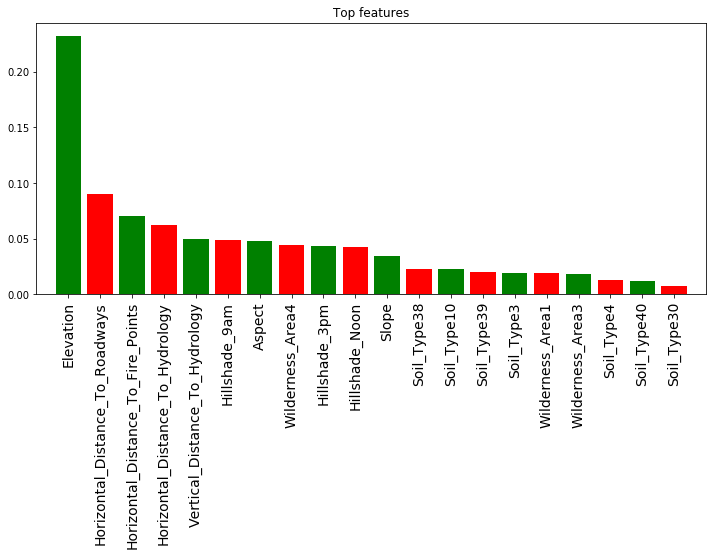

In [91]:
# Plot the feature importances of the forest
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

indices=indices[:20] 
plt.figure(figsize = (12,5)) 
plt.title("Top features") 
plt.bar(range(20), importances[indices], color="gr", align="center") 
plt.xticks(range(20), train_data.columns[indices], fontsize=14, rotation=90) 
plt.xlim([-1, 20]) 
plt.show()


The Random Forest baseline model performs well on the training data, with a 0.85 F1 score.

Elevation is exteremly significant, followed by Horizontal distance to Roadways, Fire points and Hydrology. 

#### Feature engineering - Mohan

### Feature Engiuneering

We attempt to reduce complexity by creating features by combining existing ones to  optimize our model’s performance. In order to make the best possible prediction we need to make the most of the features we are given. This involves combining two or more significant features, or categorizing different ones to make them more digestable for the model. 

1.  **Euclidian distance to Hydration**
In the Random Forest model we observed that horizontal and vertical distance were both very important features. We believe that combining these features into one would influence the model. Incorporating this new feature we can drop the other 2 features. We use Euclidian distance to combine the features. This is the diagonal distance of the two features.
<br/><br/>
$$\sqrt{\sum_{i=1}^n (x_i-y_i)^2}$$

<br/><br/>

2.  **Soil Type** – We observed in the Random Forest model that soil types were individually not very important features. So we decided to aggregate these soil types to create three new features based on their textures: `soil_stony`, `soil_rubbly`, and `soil_other`
<br/><br/>
3. **Hillshade Mean** - We are given the Hillshade index at 9:00 am, noon, and 3:00 pm. Given this information, and the fact that our prior model gave importance to these features, we added another feature `Hillshade_mean`, which represents the average of these three indices.
<br/><br/>
$$ HillshadeMean = \frac{Hillshade9am + Hillshade3pm + HillshadeNoon}{3} $$


<br/><br/>

The data cleaning, feature selection, preprocessing steps, and the feature engineering are all performed in the function `feat_eng`. This will be run on both the training and testing data, to make sure the data are in sync.

In [143]:
def feat_eng(df):
    # Adding Hillshade_Mean Feature
    df['Hillshade_Mean'] =  (df['Hillshade_9am'] + df['Hillshade_Noon']  + df['Hillshade_3pm']) / 3
    
    # Adding Euclidian Distance
    
    #df['Euclidean_Dist_To_Hydrology'] =  np.sqrt(df['Horizontal_Distance_To_Hydrology'] **2 + df['Vertical_Distance_To_Hydrology'] **2 )
    df['Euclidean_Dist_To_Hydrology'] =  np.sqrt(((df['Horizontal_Distance_To_Hydrology']-df['Vertical_Distance_To_Hydrology'])**2).sum())

    # Categorizing Soil Types by texture
    stony_col = ['Soil_Type1', 'Soil_Type2', 'Soil_Type6', 'Soil_Type9', 'Soil_Type12', 'Soil_Type18', 'Soil_Type22', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40']
    rubbly_col = ['Soil_Type3','Soil_Type4', 'Soil_Type5', 'Soil_Type10', 'Soil_Type11', 'Soil_Type13']
    other_col = ['Soil_Type8', 'Soil_Type14', 'Soil_Type16', 'Soil_Type17', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type23', 'Soil_Type35']
    df['soil_stony'] = df[stony_col].sum(axis=1)
    df['soil_rubbly'] = df[rubbly_col].sum(axis=1)
    df['soil_other'] = df[other_col].sum(axis=1)    

    # ---------- Removing below features ---------
    df = df.drop(['Id'], axis=1) # Removing 'Id' column
    df = df.drop(['Soil_Type7','Soil_Type15'], axis=1)

    return df

In [144]:
pre_processed_data = feat_eng(df)

X2, y = pre_processed_data.drop(["Cover_Type"], axis = 1), df["Cover_Type"]

X_preproc = pipeline1.fit_transform(X2)
print(X_preproc.shape)

test_data_preproc = feat_eng(test_data)
test_data_preproc = pipeline1.transform(test_data_preproc)

(15120, 57)


In [133]:
train_data2, dev_data2, train_labels2, dev_labels2 = train_test_split(X_preproc, y, test_size=0.2, random_state=42, stratify = y)
print('train_data shape: ',train_data2.shape)
print('train_labels shape: ',train_labels2.shape)
print('dev_data shape: ',dev_data2.shape)
print('dev_labels shape: ',dev_labels2.shape)

train_data shape:  (12096, 57)
train_labels shape:  (12096,)
dev_data shape:  (3024, 57)
dev_labels shape:  (3024,)


### SVM - Mohan

Support Vector Machines are a fast supervised learning model that perform non-linear classification. T

In [145]:
import time
index = np.array([0, 1, 2,3,4])
model_performance_df = pd.DataFrame(columns = ['Model Name', 'Train Time(s)', 'Prediction Time(s)', 'F1 Score'], index=index)

In [ ]:

def process_model(clf, clf_name, idx):
    start_train = time.time()
    clf.fit(train_data2, train_labels2) # Fitting the train data to the classifier   
    end_train = time.time()
    train_time = str(round(end_train - start_train, 2))
    
    # Make prediction on dev data
    start_test = time.time()
    pred = clf.predict(dev_data2)
    end_test = time.time()
    test_time = str(round(end_test - start_test, 2))
    
    # Store metrics
    dev_f1 = round(metrics.f1_score(dev_labels2, pred, average='macro'), 2)
    print('F1 Score for ' + clf_name + " = " + str(dev_f1))
    model_performance_df.iloc[idx] = [clf_name, train_time, test_time, dev_f1]
    

In [147]:
# NOTE - this step takes time - implement only once

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

params = {'kernel': ['rbf'], 'gamma': [0.5, 0.1, 0.05], 'C': [1, 10, 50, 100]}
clf = GridSearchCV(SVC(), params)
clf.fit(train_data2, train_labels2)
print(clf.best_params_) 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'C': 100, 'gamma': 0.05, 'kernel': 'rbf'}


In [149]:
# Pipeline for fitting model, making predictions, and saving performance metrics
# Using the values for the params from the grid search above

svm_clf =  SVC(kernel="rbf", gamma=.05, C=100)

start_train = time.time()
svm_clf.fit(train_data2, train_labels2) # Fitting the train data to the classifier   
end_train = time.time()
train_time = str(round(end_train - start_train, 2))
    
# Make prediction on dev data
start_test = time.time()
pred = svm_clf.predict(dev_data2)
end_test = time.time()
test_time = str(round(end_test - start_test, 2))
    
# Store metrics
dev_f1 = round(metrics.f1_score(dev_labels2, pred, average='macro'), 2)
print("F1 Score for SVM = " + str(dev_f1))
model_performance_df.iloc[0] = ['SVM', train_time, test_time, dev_f1]

F1 Score for SVM = 0.83


### Gradient Descent

### Ensemble